# 01 - Calculating and comparing rates of return

Reference : Udemy Course [https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/learn/lecture/6779998#overview] (!!!highly recommend it!!!)


Learning Goal;
1. Calculating the return of a single security
2. Calculating the return of a portfolio of securities ( stock indicies, etc..)
3. Risk, Standard deviation and Variance
4. Relationship between securities (Correlation and Covariance, and calculations )
5. Regressions; how to run regressions, $\alpha$, $\beta$, $R^2$
6. Markowitz's Portfolio Theory: 
  a. CAPM (Capital Asset Pricing Model ) : the most widely used asset pricing model
  b. Calculating Cost of Capital
  c. Sharp Ratio
7. Monte Carlo Simulation
  a. Derivatives Pricing
  b. Stock Pricing
  c. Corporate Finance
  

## Rate of Return

We can use 2 different methods to calculate rate of return:

- Simple rate of return : Preferred for multiple assets over the same timeframe
- Logarithmic rate of return : Preferred for a single asset over time

1. Simple rate of return

```python
simpleRateOfReturn = (endpingPrice - beginningPrice) / beginningPrice
```

2. Logarithmic rate of return

```python
logRateOfReturn = log(endingPrice/begininngPrice) = log endpingPrice - log beginingPrice
```

### Formula for Yearly Return

```python
yearlyReturn = [(dailyReturn+1)^365] * 100 -1  # This formula converts daily, monthly, and quarterly returns to yearly
```














In [6]:
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [8]:
MSFT = web.DataReader('MSFT', data_source='yahoo',start='2020-01-01')

In [10]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,211.330002,205.029999,209.559998,208.039993,32179400.0,208.039993
2020-07-16,205.699997,202.309998,205.399994,203.919998,29940700.0,203.919998
2020-07-17,205.039993,201.389999,204.470001,202.880005,31635300.0,202.880005
2020-07-20,212.300003,203.009995,205.000000,211.600006,36801800.0,211.600006
2020-07-21,213.940002,208.029999,213.660004,208.750000,36663976.0,208.750000


## Simple Rate of Return

<b>Reminder</b>: Simple rate of return is preferred for multiple assets over the same timeframe

$$
\frac{P1 - P0}{P0} = \frac{P1}{P0} - 1
$$

In [11]:
# Daily return
MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1

In [14]:
print (MSFT['simple_return'])

Date
2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2020-07-15   -0.001488
2020-07-16   -0.019804
2020-07-17   -0.005100
2020-07-20    0.042981
2020-07-21   -0.013469
Name: simple_return, Length: 139, dtype: float64


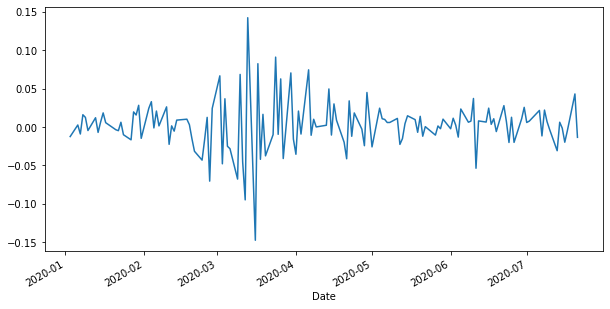

In [41]:
MSFT['simple_return'].plot(figsize=(10,5)) # creates a graph with 8,5
plt.show()

In [42]:
# Calculate average daily return
simple_avg_returns_daily = MSFT['simple_return'].mean()  # pandas.DataFrame.mean()
simple_avg_returns_daily

0.0024879666294645095

In [43]:
# Calculate average return per year
simple_avg_returns_annually = MSFT['simple_return'].mean()*250  # 250 Number of trading days in a year  
simple_avg_returns_annually

0.6219916573661274

In [54]:
print(str(round(simple_avg_returns_annually,5) * 100) + '%')

62.199000000000005%


## Log Returns

<b>Reminder</b>: Preferred for a single asset over time

$$
ln(\frac{P_{t}}{P_{t-1}})
$$


In [39]:
# Numpy offers the posibility of vectorized (array programming) computation 
# Recommended instead of using loops for multi dimensional arrays computations
import numpy as np 

In [40]:
MSFT['log_return'] = np.log (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
print(MSFT['log_return'])

Date
2020-01-02         NaN
2020-01-03   -0.012530
2020-01-06    0.002582
2020-01-07   -0.009160
2020-01-08    0.015803
                ...   
2020-07-15   -0.001489
2020-07-16   -0.020003
2020-07-17   -0.005113
2020-07-20    0.042083
2020-07-21   -0.013560
Name: log_return, Length: 139, dtype: float64


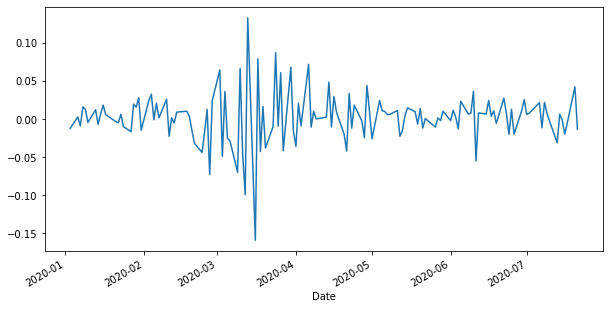

In [46]:
MSFT['log_return'].plot(figsize=(10,5))
plt.show()
                        

In [48]:
log_avg_return_daily = MSFT['log_return'].mean()
log_avg_return_daily

0.0019391661488882678

In [49]:
log_avg_return_annually = MSFT['log_return'].mean() * 250
log_avg_return_annually

0.48479153722206697

In [53]:
print(str(round(log_avg_return_annually,5) * 100) + '%')

48.479%


## Rate of Return for Portfolio of Securities

$$
portfolioRateOfReturn = rateOfReturnOfASecurity * weightInPortfolio
$$

In [55]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 

In [85]:
tickers = ['PG', 'MSFT', 'AAPL' ]
myData = pd.DataFrame()
for t in tickers:
    myData[t] = wb.DataReader(t, data_source='yahoo', start='2000-01-01', end='2019-12-31')['Adj Close']

In [86]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2000-01-03 to 2019-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5031 non-null   float64
 1   MSFT    5031 non-null   float64
 2   AAPL    5031 non-null   float64
dtypes: float64(3)
memory usage: 157.2 KB


In [87]:
print(myData.head())
print(myData.tail())

                   PG       MSFT      AAPL
Date                                      
2000-01-03  28.391300  37.289700  3.460857
2000-01-04  27.844984  36.030037  3.169071
2000-01-05  27.315243  36.409924  3.215448
2000-01-06  28.573389  35.190277  2.937188
2000-01-07  30.857954  35.650139  3.076317
                    PG        MSFT        AAPL
Date                                          
2019-12-24  123.655876  156.515396  282.831299
2019-12-26  123.655876  157.798309  288.442780
2019-12-27  124.515007  158.086731  288.333313
2019-12-30  122.915245  156.724243  290.044617
2019-12-31  123.339874  156.833633  292.163818


### Normalization to 100

$$
\frac{P_{t}}{P_{0}} * 100
$$

In [92]:
myData.iloc[0] # get first Row. Column names becomes Key.

PG      28.391300
MSFT    37.289700
AAPL     3.460857
Name: 2000-01-03 00:00:00, dtype: float64

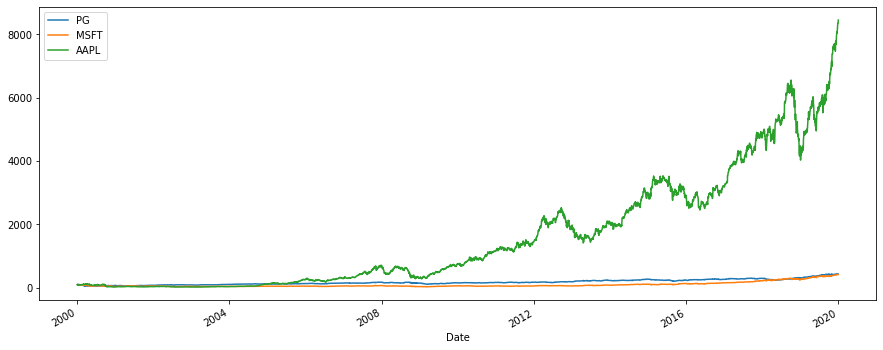

In [93]:
# applying the normalization formula
Pt = myData
P0 = myData.iloc[0]

( Pt / P0 * 100).plot(figsize=(15,6)) # * 100; basically all the stocks are starting from 100 
plt.show()

In [96]:
myData.loc['2000-01-03 00:00:00']  #Access group of rows and columns by label(s) or a boolean array

PG      28.391300
MSFT    37.289700
AAPL     3.460857
Name: 2000-01-03 00:00:00, dtype: float64

In [98]:
myData.iloc[0] #

PG      28.391300
MSFT    37.289700
AAPL     3.460857
Name: 2000-01-03 00:00:00, dtype: float64